In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

df=pd.read_excel('https://labfile.oss.aliyuncs.com/courses/3023/World_health_organization_clearning.xlsx')

cont_code_name={
    'AF':'Africa',
    'EM':'Eastern Mediterranean',
    'HQ':'Headquarters',
    'SE':'South East Asia',
    'EU':'Europe',
    'WP':'Western Pacific',
    'AM':'Americas',    
}

df['cont_name']=df['cont'].apply(lambda x:cont_code_name[x])

df.head()

,orgs,cont,direction,money,cont_name
0,United States of America,EM,from,201720000.0,Eastern Mediterranean
1,United Nations Office for theCoordination of H...,EM,from,168756000.0,Eastern Mediterranean
2,Bill & Melinda Gates Foundation,EM,from,117711000.0,Eastern Mediterranean
3,World Bank,EM,from,87699000.0,Eastern Mediterranean
4,Kuwait,EM,from,63468000.0,Eastern Mediterranean


|字段|解释|
|---|---|
|orgs|资金来源组织或资金投向项目|
|cont|被投资项目所在全球大区的简称，例如 AF 表示非洲区|
|direction|资金来源或资金去向，from 表示资金进入世卫组织，to 表示资金由世卫组织投向项目|
|money|资金，单位：美元|
|cont_name|被投资项目所在全球大区的全称|

### Contributing Fund

Text(0.5, 1.0, 'Funding Structure of WHO')

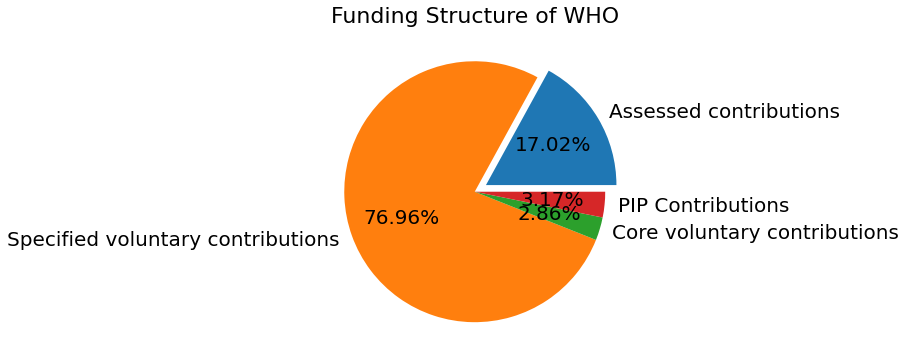

In [3]:
plt.rcParams['figure.figsize']=(10,6)

funding_structure = {
    'Assessed contributions': 956900000,
    'Specified voluntary contributions': 4328057662,
    'Core voluntary contributions': 160592410.5,
    'PIP Contributions': 178053223,
}

plt.pie(
    x=funding_structure.values(),
    labels=funding_structure.keys(),
    explode=[0.1,0,0,0],
    textprops={'size':20},
    autopct='%.2f%%')

plt.title('Funding Structure of WHO',size=22)

### Funding Projects

In [25]:
import numpy as np

funding_from=df.loc[df['direction']=='from'].groupby(['orgs'])['money'].sum().sort_values(ascending=False)
funding_from=funding_from/np.sum(funding_from)

funding_to=df.loc[df['direction']=='to'].groupby(['orgs'])['money'].sum().sort_values(ascending=False)
funding_to=funding_to/np.sum(funding_to)

funding_from_to=pd.concat([funding_from,funding_to])
funding_from_to

orgs
United States of America                                         0.151796
Bill & Melinda Gates Foundation                                  0.121231
GAVI Alliance                                                    0.081886
United Kingdom of Great Britain andNorthern Ireland              0.079113
Germany                                                          0.053295
                                                                   ...   
Equity, social determinants, genderequality and human rights     0.001244
Transparency, accountability and riskmanagement                  0.001064
Ageing and health                                                0.000819
Strategic communications                                         0.000396
Management and administration                                    0.000159
Name: money, Length: 341, dtype: float64

Text(0.5, 1.0, 'Where does WHO fundings go and from')

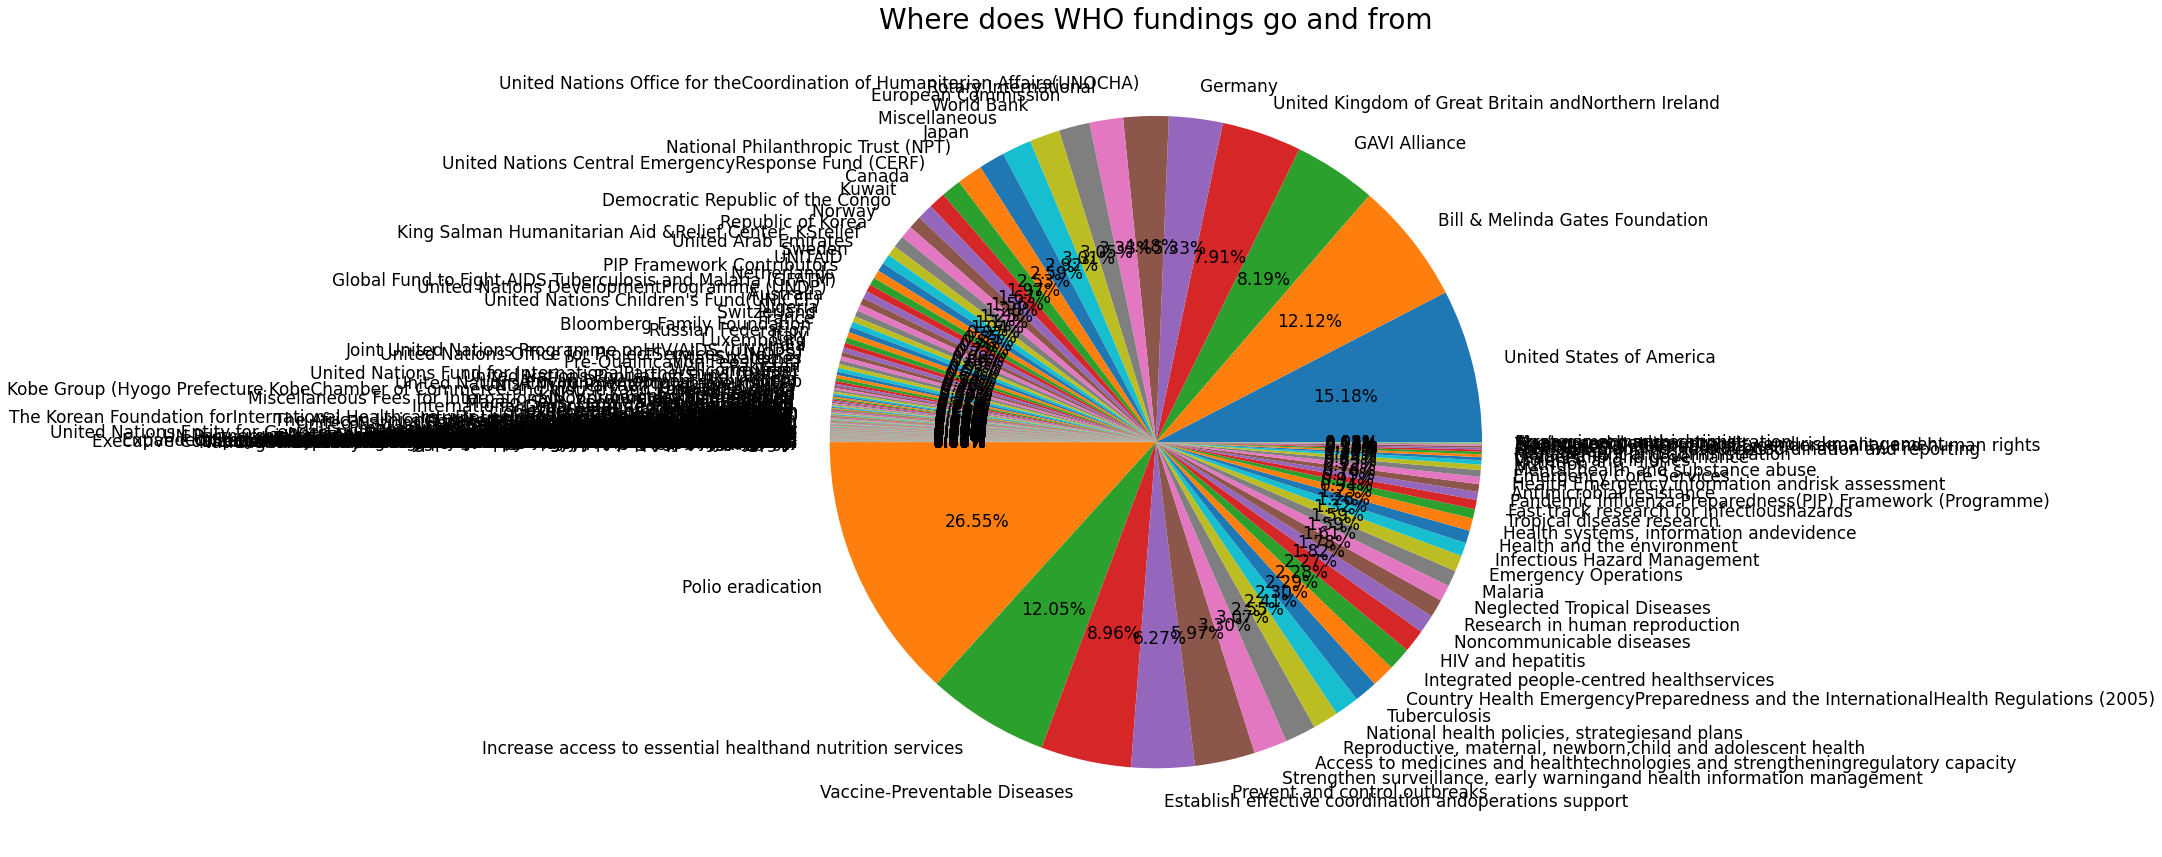

In [26]:
plt.rcParams['figure.figsize']=(15,15)

def autopct_fun(x):
    return '%.2f%%'%(2*x)

plt.pie(
    x=funding_from_to,
    labels=funding_from_to.index,
    textprops={'size':17},
    autopct=autopct_fun)

plt.title('Where does WHO fundings go and from',size=28)

Text(0.5, 1.0, 'Where does WHO fundings go and from')

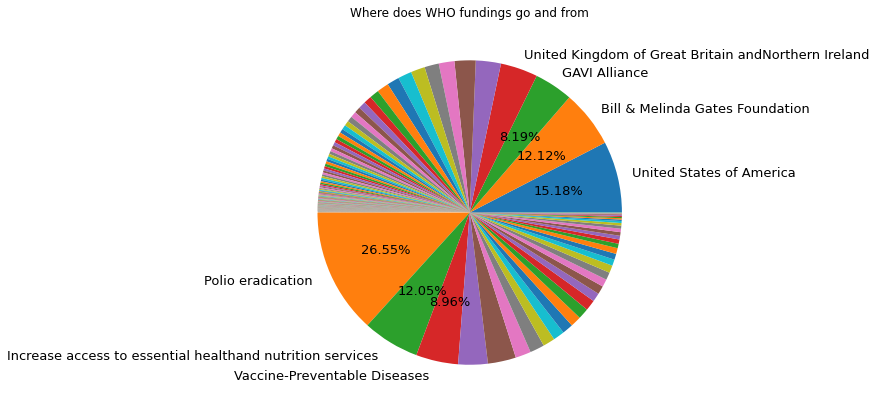

In [27]:
plt.rcParams['figure.figsize']=(14,7)

def autopct_fun(x):
    if 2*x<8:
        return None
    else:
        return '%.2f%%'%(2*x)

plt.pie(
    x=funding_from_to.values,
    labels=list(funding_from_to.index[0:4])+['' for i in funding_from_to.index[4:301]]+list(funding_from_to.index[301:304])+['' for i in funding_from_to.index[304:]],
    textprops={'size':13},
    autopct=autopct_fun)

plt.title('Where does WHO fundings go and from')

### fundings in different regions

In [28]:
funding_cont_to=df.loc[df['direction']=='to'].groupby(['cont'])['money'].sum().sort_values(ascending=False)
funding_cont_to=funding_cont_to/np.sum(funding_cont_to)
funding_cont_to.head()

cont
AF    0.318022
EM    0.270481
HQ    0.255502
EU    0.053120
SE    0.052148
Name: money, dtype: float64

In [8]:
import matplotlib.colors as cs

start_colors=[cs.to_rgba(value) for value in cs.TABLEAU_COLORS.values()]
start_colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)]

In [29]:
colors=[]

for i,c in enumerate(funding_cont_to.index):
    funding_projection=df.loc[(df['direction']=='to') & (df['cont']==c), ['orgs','money']].sort_values('money',ascending=False)
    color_nums=len(funding_projection)
    r,g,b,a=start_colors[i]
    for r_new,g_new,b_new in zip(np.linspace(r,1,color_nums),np.linspace(g,1,color_nums),np.linspace(b,1,color_nums)):
        colors.append((r_new,g_new,b_new,1.0))
colors[:5]

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.14740484429065742, 0.4823529411764706, 0.7145328719723184, 1.0),
 (0.1732410611303345, 0.4980392156862745, 0.7231833910034603, 1.0),
 (0.1990772779700115, 0.5137254901960784, 0.7318339100346021, 1.0),
 (0.22491349480968859, 0.5294117647058824, 0.740484429065744, 1.0)]

In [31]:
labels=[]

for i,c in enumerate(funding_cont_to.index):
    funding_projection=df.loc[(df['direction']=='to') & (df['cont']==c), ['orgs','money']].sort_values('money',ascending=False)
    show_top=1
    label=np.append(funding_projection['orgs'][:show_top],['']*(len(funding_projection)-show_top))
    labels=np.append(labels,label)
    
labels[:5]

array(['Polio eradication ', '', '', '', ''], dtype=object)

In [32]:
funding_project_to=pd.DataFrame()

for i,c in enumerate(funding_cont_to.index):
    funding_projection=df.loc[(df['direction']=='to') & (df['cont']==c), ['orgs','money']].sort_values('money',ascending=False)
    funding_project_to=pd.concat([funding_project_to,funding_projection])

funding_project_to.set_index(['orgs'],inplace=True)
funding_project_to=funding_project_to/np.sum(funding_project_to)
funding_project_to.head()

,money
orgs,
Polio eradication,0.114057
Vaccine-Preventable Diseases,0.034519
Establish effective coordination andoperations support,0.033056
Prevent and control outbreaks,0.032992
"Strengthen surveillance, early warningand health information management",0.019216


#### Half Circle

Text(0.5, 1.0, 'Funded Zone and Top 1 important funded program')

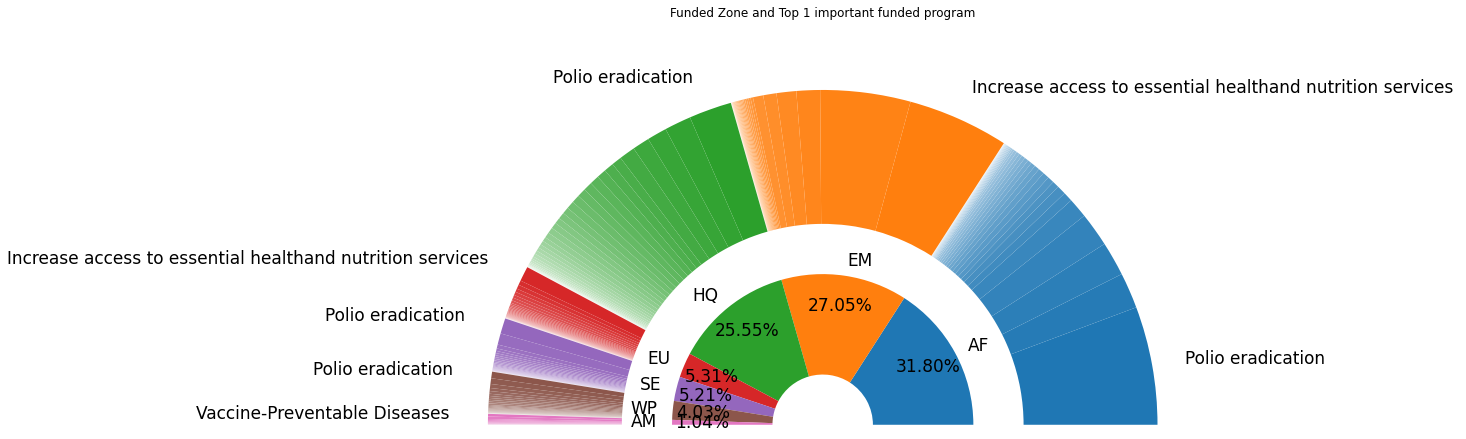

In [55]:
plt.rcParams['figure.figsize']=(15,15)

def autopct_fun(x):
    return '%.2f%%'%(2*x)

plt.pie(x=(.5*funding_project_to).squeeze(),labels=labels,radius=1,wedgeprops={'width':.4},colors=colors,textprops={'size':17},autopct='')

plt.pie(x=.5*funding_cont_to,labels=funding_cont_to.index,radius=.45,pctdistance=.8,wedgeprops={'width':.3},colors=cs.TABLEAU_COLORS,textprops={'size':17},autopct=autopct_fun)

plt.ylim(.5,1.2)
plt.title('Funded Zone and Top 1 important funded program')

### Funding project in Africa

In [56]:
first_large=funding_to[0]

funding_to_related=funding_to/first_large*.5
funding_to_related.head(10).index[:10]

Index(['Polio eradication ',
       'Increase access to essential healthand nutrition services ',
       'Vaccine-Preventable Diseases ',
       'Establish effective coordination andoperations support ',
       'Prevent and control outbreaks ',
       'Strengthen surveillance, early warningand health information management',
       'Access to medicines and healthtechnologies and strengtheningregulatory capacity ',
       'Reproductive, maternal, newborn,child and adolescent health ',
       'National health policies, strategiesand plans ', 'Tuberculosis '],
      dtype='object', name='orgs')

Text(0.5, 1.0, 'Funded program of Africa Related to Polio eradication')

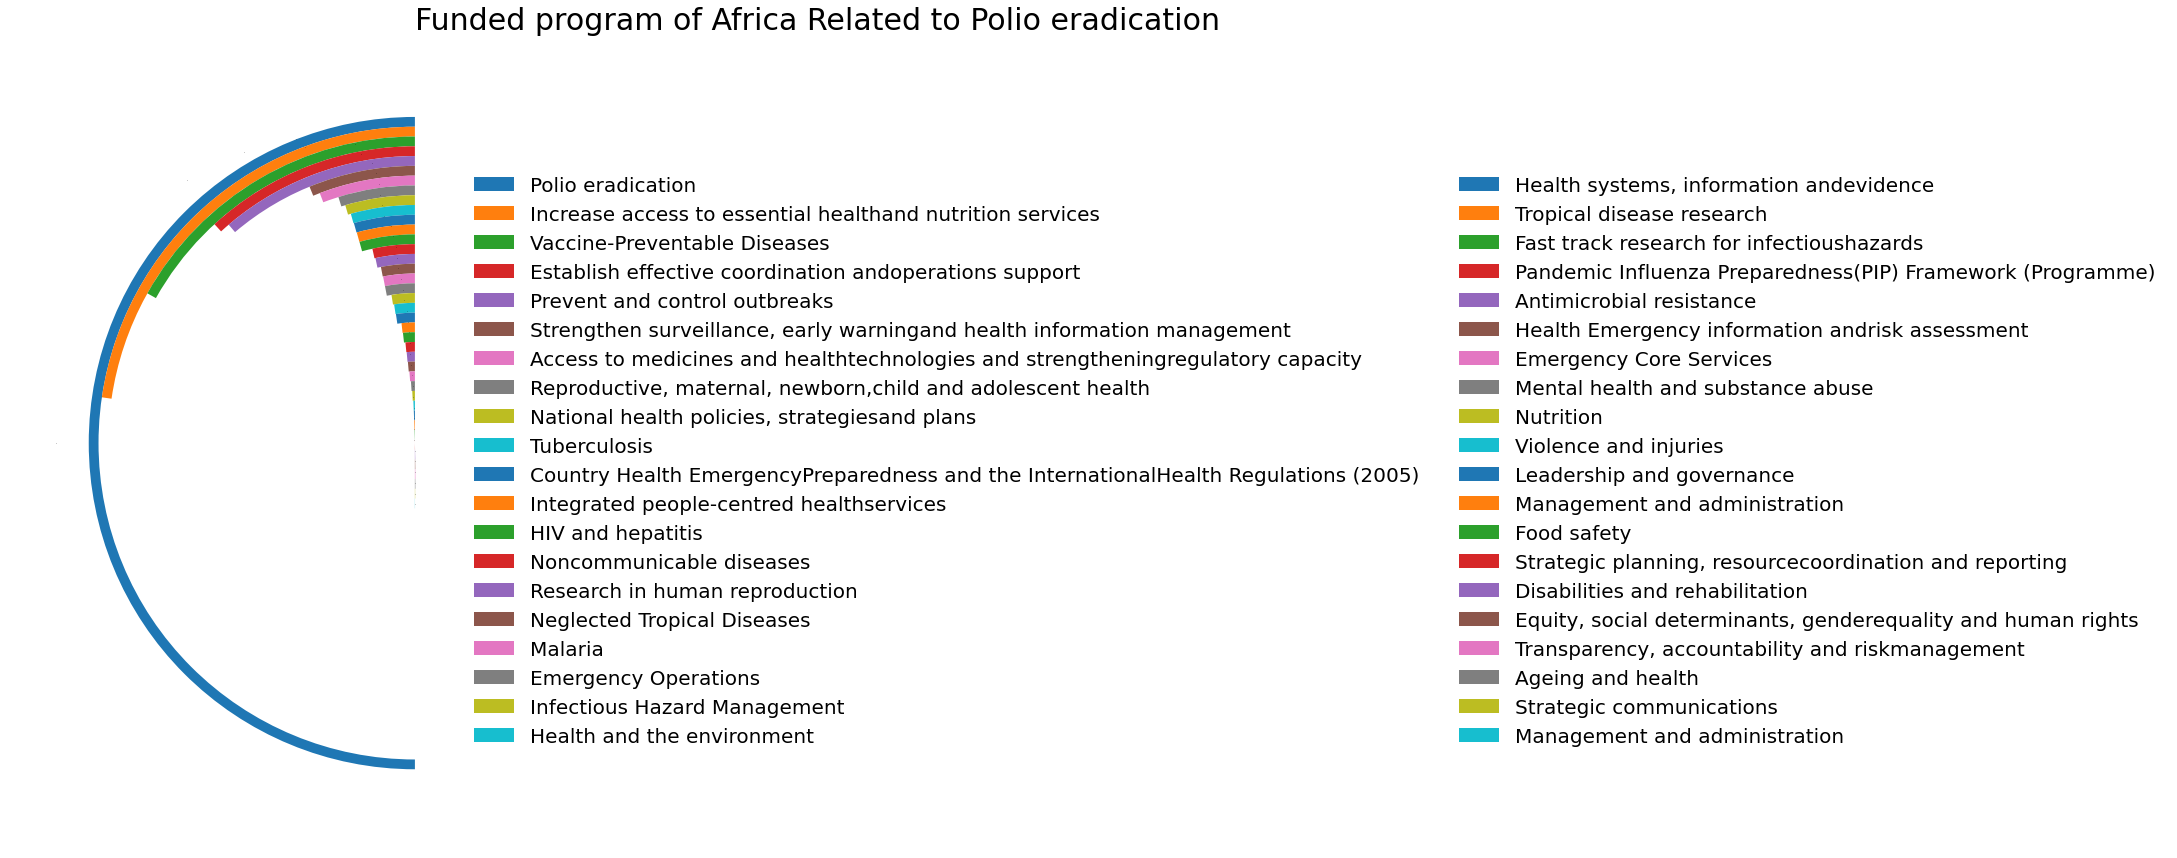

In [84]:
width=.03

fig,ax=plt.subplots(1,1,figsize=(15,15))

for i,projection_percent in enumerate(funding_to_related):
    lst=[]
    lst.append(projection_percent)
    ax.pie(x=lst,startangle=90,radius=1-i*width,labels=['a'],autopct='',textprops={'size':0},wedgeprops={'width':width})

h,l=ax.get_legend_handles_labels()
plt.legend(handles=h,labels=list(funding_to_related.index),ncol=2,bbox_to_anchor=(.55,.85),loc='upper left',frameon=False,fontsize=20)
plt.title('Funded program of Africa Related to Polio eradication',fontsize=30,ha='left')

### Funding distribution

In [105]:
funding_programs=df.loc[df['direction']=='to'].copy()

bins=[funding_programs['money'].min(),1e7,1e8,funding_programs['money'].max()]
funding_programs['program_structure']=pd.cut(funding_programs['money'],bins=bins,labels=['<10M','10M-100M','>100M'])
funding_programs['money']=funding_programs['money']/np.sum(funding_programs['money'])
funding_programs.head()

,orgs,cont,direction,money,cont_name,program_structure
81,Increase access to essential healthand nutriti...,EM,to,0.097462,Eastern Mediterranean,>100M
82,Polio eradication,EM,to,0.086915,Eastern Mediterranean,>100M
83,Prevent and control outbreaks,EM,to,0.022743,Eastern Mediterranean,10M-100M
84,Establish effective coordination andoperations...,EM,to,0.019038,Eastern Mediterranean,10M-100M
85,Vaccine-Preventable Diseases,EM,to,0.012710,Eastern Mediterranean,10M-100M


Text(0.5, 0.98, 'The Funded Programs Budget Structure of Different Zones')

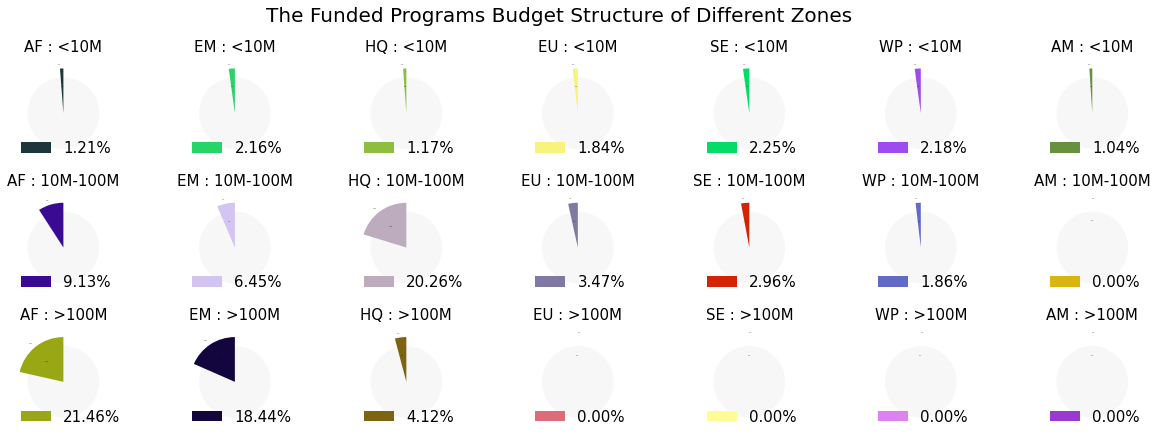

In [106]:
np.random.seed(121)
row_names = ['<10M', '10M-100M', '>100M']
col_names = ['AF', 'EM', 'HQ', 'EU', 'SE', 'WP', 'AM']

fig, axs = plt.subplots(
    nrows=len(row_names),
    ncols=len(col_names),
    figsize=(len(row_names)*7, len(col_names)*1))

for i, s in enumerate(row_names):
    for j, c in enumerate(col_names):
        ax = axs[i, j]

        x=funding_programs.loc[(funding_programs['cont']==c)&(funding_programs['program_structure']==s)]['money'].sum()

        ax.pie([1], radius=0.8, colors=[(0.97, 0.97, 0.97)])

        ax.pie(x=[x],
               startangle=90,
               radius=1.0,
               labels=['%.2f%%' % round(x*100, 2)],
               autopct='%.2f%%',
               colors=np.random.random(size=(1, 3)),
               textprops={'size': 0},
               )
        ax.legend(frameon=False, fontsize=15)
        ax.set_title(label='%s : %s' % (c, s), size=15)

fig.suptitle('The Funded Programs Budget Structure of Different Zones', size=20)

### Tree diagram

In [108]:
from pyecharts import options as opts
from pyecharts.charts import TreeMap

funding_to=df.loc[df['direction']=='to'].groupby(['orgs'])['money'].sum().sort_values(ascending=False)
funding_to=funding_to/np.sum(funding_to)

funding_to_treemap=[{'value':value,'name':name} for name,value in zip(funding_to.index,funding_to)]

tree=TreeMap()
tree.add('Funded Budget',funding_to_treemap,label_opts=opts.LabelOpts(position='inside',font_size=12),
         drilldown_icon=' ',leaf_depth=1)
tree.set_global_opts(title_opts=opts.TitleOpts(title='The Funded Program Budget Structure'),
                     legend_opts=opts.LegendOpts(pos_top='5%',textstyle_opts=opts.TextStyleOpts(font_size=15)))
tree.render_notebook()

In [110]:
funding_to=df.loc[df['direction']=='to'].groupby(['cont_name','orgs'],as_index=False)['money'].sum()
funding_to['money']=funding_to['money']/np.sum(funding_to['money'])

funding_to_treemap=[{'value': funding_to.loc[funding_to['cont_name'] == name]['money'].sum(),
     'name': name,
     'children':[
        {'value': funding_to.loc[(funding_to['cont_name'] == name) & (funding_to['orgs'] == org)]['money'].sum(),
        'name': org}
        for org in list(set(funding_to.loc[funding_to['cont_name'] == name, 'orgs']))]}
    for name in list(set(funding_to['cont_name']))]

tree=TreeMap()
tree.add('Funded Budget',funding_to_treemap,label_opts=opts.LabelOpts(position='inside',font_size=20),
         drilldown_icon=' ',leaf_depth=1)
tree.set_global_opts(title_opts=opts.TitleOpts(title='The Funded Program Budget Structure Of Different Zones'),
                     legend_opts=opts.LegendOpts(pos_top='5%',textstyle_opts=opts.TextStyleOpts(font_size=15)))
tree.render_notebook()

### Sunflower

In [112]:
from pyecharts.charts import Sunburst

sun=Sunburst()
sun.add(
    '',
    data_pair=funding_to_treemap,
    highlight_policy="ancestor",
    radius=[0, "95%"],
    sort_="null",
    label_opts=opts.LabelOpts(is_show=False,position='inside',font_size=5),
    levels=[
        {                 # outer
            "r0":"65%",   # inner radius
            "r":"95%",    # outer radius
            "itemStyle":{"borderWidth":2},
            "label":{"rotate":"tangential"},
        },
        {                 # inner
            "r0":"25%",
            "r":"45%",
        },
    ],
)
sun.set_global_opts(title_opts=opts.TitleOpts(title="The Funded Programs Budget Structure of Different Zones"))
sun.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}"))
sun.render_notebook()

### Flow of WHO Fund >>>Sunkey

In [113]:
data=df.copy()

limit_money=1e7

data['orgs_adjust']=data['orgs']
data.loc[(data['direction']=='from')&(data['money']<=limit_money),'orgs_adjust']='other contributions'
data.loc[(data['direction']=='to')&(data['money']<=limit_money),'orgs_adjust']='other programs'

data.head()

,orgs,cont,direction,money,cont_name,orgs_adjust
0,United States of America,EM,from,201720000.0,Eastern Mediterranean,United States of America
1,United Nations Office for theCoordination of H...,EM,from,168756000.0,Eastern Mediterranean,United Nations Office for theCoordination of H...
2,Bill & Melinda Gates Foundation,EM,from,117711000.0,Eastern Mediterranean,Bill & Melinda Gates Foundation
3,World Bank,EM,from,87699000.0,Eastern Mediterranean,World Bank
4,Kuwait,EM,from,63468000.0,Eastern Mediterranean,Kuwait


In [114]:
sankey_value='money'

node_lists = np.append(np.unique(data['orgs_adjust']),(np.unique(data['cont'])))
nodes = [
    {
        'name': node
    }
    for node in node_lists
]
links = [
    {
        "source": s,
        "target": t,
        "value": v
    }
    for s, t, v in zip(data.loc[data['direction'] == 'from', 'orgs_adjust'],
                       data.loc[data['direction'] == 'from', 'cont'],
                       data.loc[data['direction'] == 'from', sankey_value],
                       )
]+[
    {
        "source": s,
        "target": t,
        "value": v
    }
    for t, s, v in zip(data.loc[data['direction'] == 'to', 'orgs_adjust'],
                       data.loc[data['direction'] == 'to', 'cont'],
                       data.loc[data['direction'] == 'to', sankey_value],
                       )
]

In [115]:
from pyecharts.charts import Sankey

init_opts=opts.InitOpts(width='1000px',height='1000px')
sankey=Sankey(init_opts=init_opts)
sankey.add(
    series_name="",
    nodes=nodes,
    links=links,
    node_gap=7,
    label_opts=opts.LabelOpts(position='right',font_size=15),
    itemstyle_opts=opts.ItemStyleOpts(border_width=2),
    linestyle_opt=opts.LineStyleOpts(color="source", width=2,curve=0.5, opacity=0.5),
    tooltip_opts=opts.TooltipOpts(trigger_on="click")
)
sankey.set_global_opts(
    title_opts=opts.TitleOpts(title="The Funding Budget Flows of Specified Voluntary Contributions of WHO in Year 2018 - 2019"),    
)
sankey.render_notebook()